In [107]:
import pandas as pd
from matplotlib import pylab
import numpy as np

In [108]:
# load the raw data and set up the filter
counts = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_hek_df100.csv')

In [109]:
## Remove rows of STXBP1 lib
counts = counts[~ counts['Name'].str.contains('frag')]
len(counts)

11240

In [110]:
counts.tail()

,Name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Seq,hek-gDNA1,hek-gDNA2,...,hek-RNA2,hek-RNA3,sk-gDNA1,sk-gDNA2,sk-gDNA3,sk-RNA1,sk-RNA2,sk-RNA3,aso-lib1,aso-lib2
11235,DMD|ENST00000357033.9|16|scrambled,212.672397,-4.116803,0.258261,-15.940488,3.317530e-57,2.528245e-56,ATTATCGCGTGTGTTCTTTTTAAAATATCC,476,446,...,20,20,420,309,172,9,11,7,428,364
11236,SETBP1|ENST00000649279.2|32|scrambled,2128.024767,-0.611302,0.086509,-7.066364,1.590459e-12,3.128686e-12,AAAATCAAGTGCATGTTTATGCTGTTATAT,3072,2779,...,1295,1511,3250,2649,2299,1275,1388,1361,3187,2740
11237,GRIN2A|ENST00000330684.4|9|scrambled,1955.357934,-1.641166,0.105450,-15.563405,1.290476e-54,9.330054e-54,CGAGCTTTATACTCAATGTCGCGCAACGAT,3724,3248,...,787,877,3941,3476,4577,548,482,460,5241,4480
11238,HMGA1|ENST00000311487.9|3|scrambled,3540.392665,1.749646,0.105661,16.559113,1.376085e-61,1.164230e-60,ACATCAGCCCCACTTGTCCCTGCGCCCGGC,1731,1726,...,4107,4617,3545,3076,4068,5950,4400,6817,4992,4918
11239,IGF1R|ENST00000650285.1|31|scrambled,4011.588887,1.730279,0.086537,19.994748,6.118715e-89,9.208819e-88,AAGTGTTGTCTAGGGCGACTATCTATAAAG,2246,1898,...,5136,4811,3170,2954,3960,3568,3428,4115,4870,4357


In [111]:
import pandas as pd

# Keep rows where 'Name' contains 'mutated' but not 'scrambled'
mut_df = counts[counts['Name'].str.contains(r'\bmutated\b', na=False) & ~counts['Name'].str.contains(r'\bscrambled\b', na=False)].copy()
mut_df.to_csv('mut_hek.csv', index=False)

# Keep rows where 'Name' contains 'scrambled' but not 'mutated'
scb_df = counts[counts['Name'].str.contains(r'\bscrambled\b', na=False) & ~counts['Name'].str.contains(r'\bmutated\b', na=False)].copy()
scb_df.to_csv('scb_hek.csv', index=False)

# Keep rows that are neither 'mutated' nor 'scrambled'
wt_df = counts[~counts['Name'].str.contains(r'\b(mutated|scrambled)\b', na=False)].copy()
wt_df.to_csv('wt_hek.csv', index=False)

/tmp/ipykernel_3206370/2955961651.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wt_df = counts[~counts['Name'].str.contains(r'\b(mutated|scrambled)\b', na=False)].copy()


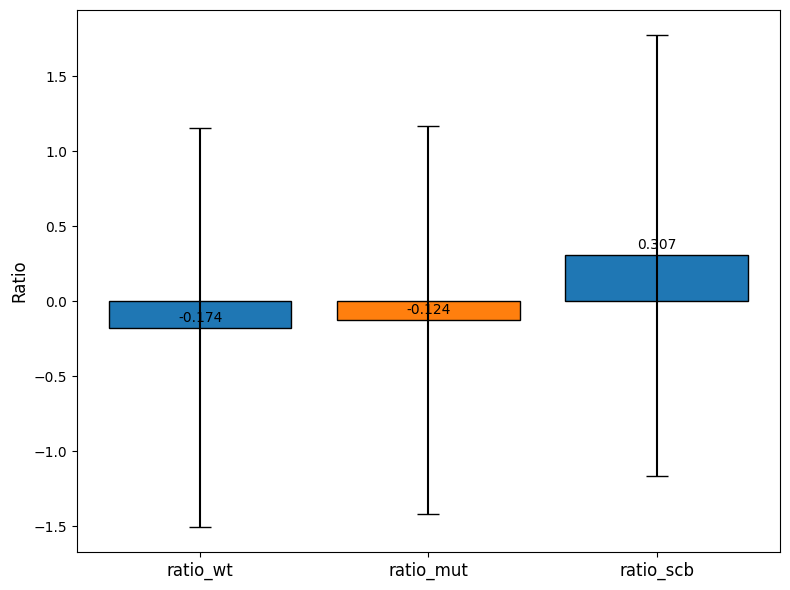

In [112]:
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

counts_wt = pd.read_csv("wt_hek.csv")
counts_mut = pd.read_csv('mut_hek.csv')
counts_scb = pd.read_csv('scb_hek.csv')

# Extract relevant columns to numpy arrays
# Calculate intermediate results

# HEK293T
Ratio_wt = counts_wt['log2FoldChange']
Ratio_mut = counts_mut['log2FoldChange']
Ratio_scb = counts_scb['log2FoldChange']
            

# Create DataFrame for plotting
df = pd.DataFrame({'ratio_wt': Ratio_wt, 'ratio_mut': Ratio_mut, 'ratio_scb': Ratio_scb})

# Drop NaN and infinite values
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate medians and standard deviations
medians = df_cleaned.median()
std_devs = df_cleaned.std()

# Plot
plt.figure(figsize=(8, 6))

# Create bars with error bars
bars = plt.bar(df_cleaned.columns, medians, yerr=std_devs, capsize=8, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Annotate medians on top of each bar
for bar, median in zip(bars, medians):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{median:.3f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.ylabel('Ratio', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

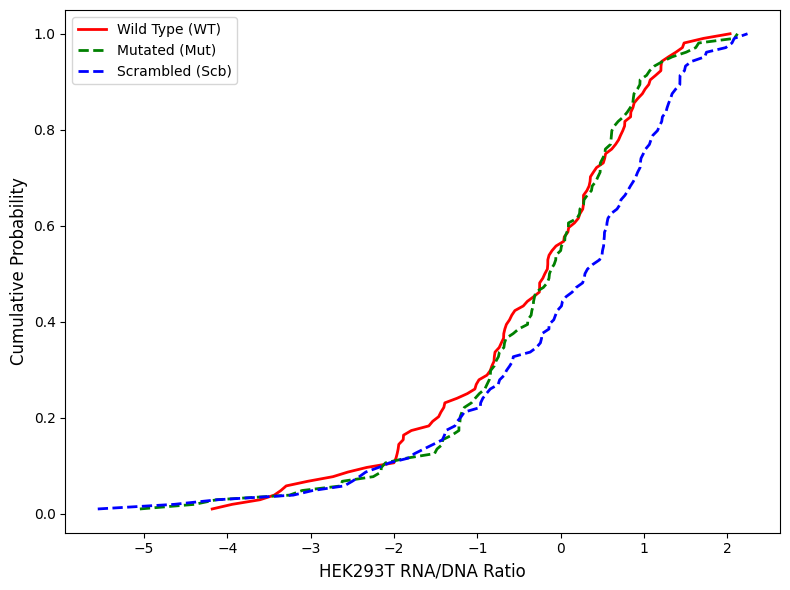

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Create DataFrame for analysis
df = pd.DataFrame({'ratio_wt': Ratio_wt, 'ratio_mut': Ratio_mut, 'ratio_scb': Ratio_scb})

# Clean DataFrame
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# Extract cleaned ratios
cleaned_wt = df_cleaned['ratio_wt']
cleaned_mut = df_cleaned['ratio_mut']
cleaned_scb = df_cleaned['ratio_scb']

# Generate ECDF for wild type and mutant
ecdf_wt = ECDF(cleaned_wt)
ecdf_mut = ECDF(cleaned_mut)
ecdf_scb = ECDF(cleaned_scb)

# Plot CEDF
plt.figure(figsize=(8, 6))

# Plot CEDF for wild type
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)

# Plot CEDF for mutant
plt.plot(ecdf_mut.x, ecdf_mut.y, label='Mutated (Mut)', color='green', linestyle='--', lw=2)

# Plot CEDF for scrambled
plt.plot(ecdf_scb.x, ecdf_scb.y, label='Scrambled (Scb)', color='blue', linestyle='--', lw=2)

# Add labels, legend, and title
plt.xlabel('HEK293T RNA/DNA Ratio', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
# plt.title('Cumulative Empirical Distribution Function (CEDF)', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


## Sk cell line

In [114]:
# load the raw data and set up the filter
counts = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv')

## Remove rows of STXBP1 lib
counts = counts[~ counts['Name'].str.contains('frag')]
len(counts)

11048

In [115]:
import pandas as pd

# Keep rows where 'Name' contains 'mutated' but not 'scrambled'
mut_df = counts[counts['Name'].str.contains(r'\bmutated\b', na=False) & ~counts['Name'].str.contains(r'\bscrambled\b', na=False)].copy()
mut_df.to_csv('mut_sk.csv', index=False)

# Keep rows where 'Name' contains 'scrambled' but not 'mutated'
scb_df = counts[counts['Name'].str.contains(r'\bscrambled\b', na=False) & ~counts['Name'].str.contains(r'\bmutated\b', na=False)].copy()
scb_df.to_csv('scb_sk.csv', index=False)

# Keep rows that are neither 'mutated' nor 'scrambled'
wt_df = counts[~counts['Name'].str.contains(r'\b(mutated|scrambled)\b', na=False)].copy()
wt_df.to_csv('wt_sk.csv', index=False)

/tmp/ipykernel_3206370/1890518325.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wt_df = counts[~counts['Name'].str.contains(r'\b(mutated|scrambled)\b', na=False)].copy()


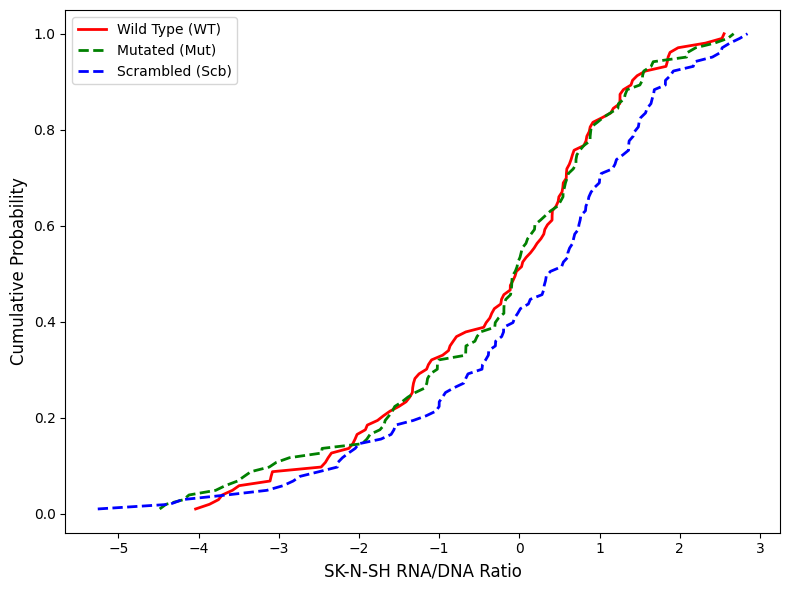

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as st
import random
from scipy.stats import ttest_ind

counts_wt = pd.read_csv("wt_sk.csv")
counts_mut = pd.read_csv('mut_sk.csv')
counts_scb = pd.read_csv('scb_sk.csv')

# Extract relevant columns to numpy arrays
# Calculate intermediate results

# Sk
Ratio_wt = counts_wt['log2FoldChange']
Ratio_mut = counts_mut['log2FoldChange']
Ratio_scb = counts_scb['log2FoldChange']

# Create DataFrame for analysis
df = pd.DataFrame({'ratio_wt': Ratio_wt, 'ratio_mut': Ratio_mut, 'ratio_scb': Ratio_scb})

# Clean DataFrame
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# Extract cleaned ratios
cleaned_wt = df_cleaned['ratio_wt']
cleaned_mut = df_cleaned['ratio_mut']
cleaned_scb = df_cleaned['ratio_scb']

# Generate ECDF for wild type and mutant
ecdf_wt = ECDF(cleaned_wt)
ecdf_mut = ECDF(cleaned_mut)
ecdf_scb = ECDF(cleaned_scb)

# Plot CEDF
plt.figure(figsize=(8, 6))

# Plot CEDF for wild type
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)

# Plot CEDF for mutant
plt.plot(ecdf_mut.x, ecdf_mut.y, label='Mutated (Mut)', color='green', linestyle='--', lw=2)

# Plot CEDF for scrambled
plt.plot(ecdf_scb.x, ecdf_scb.y, label='Scrambled (Scb)', color='blue', linestyle='--', lw=2)

# Add labels, legend, and title
plt.xlabel('SK-N-SH RNA/DNA Ratio', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
# plt.title('Cumulative Empirical Distribution Function (CEDF)', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


In [117]:
## Sk cell line

import pandas as pd

counts = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv')

## Remove rows of STXBP1 lib
counts = counts[~ counts['Name'].str.contains('frag')]
# Extract gene identifier (first three parts of 'Name')
counts['Gene_ID'] = counts['Name'].str.extract(r'^([^|]+\|[^|]+\|[^|]+)')

# Identify genes that have at least one 'mutated' or 'scrambled' version
mutated_genes = counts[counts['Name'].str.contains('mutated', na=False)]['Gene_ID'].unique()
scrambled_genes = counts[counts['Name'].str.contains('scrambled', na=False)]['Gene_ID'].unique()

# Get all relevant genes (genes that have mutated or scrambled versions)
relevant_genes = set(mutated_genes) | set(scrambled_genes)

# Filter rows to keep only those whose 'Gene_ID' is in relevant_genes
filtered_df = counts[counts['Gene_ID'].isin(relevant_genes)].copy()

# Save the filtered DataFrame
# filtered_df.to_csv('counts_filtered.csv', index=False)

# Optionally, separate them into individual files
mut_df = filtered_df[filtered_df['Name'].str.contains('mutated', na=False)].copy()
mut_df.to_csv('counts_mut.csv', index=False)

scb_df = filtered_df[filtered_df['Name'].str.contains('scrambled', na=False)].copy()
scb_df.to_csv('counts_scb.csv', index=False)

wt_df = filtered_df[~filtered_df['Name'].str.contains('(mutated|scrambled)', na=False)].copy()
wt_df.to_csv('counts_wt.csv', index=False)


/tmp/ipykernel_3206370/3702711964.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wt_df = filtered_df[~filtered_df['Name'].str.contains('(mutated|scrambled)', na=False)].copy()


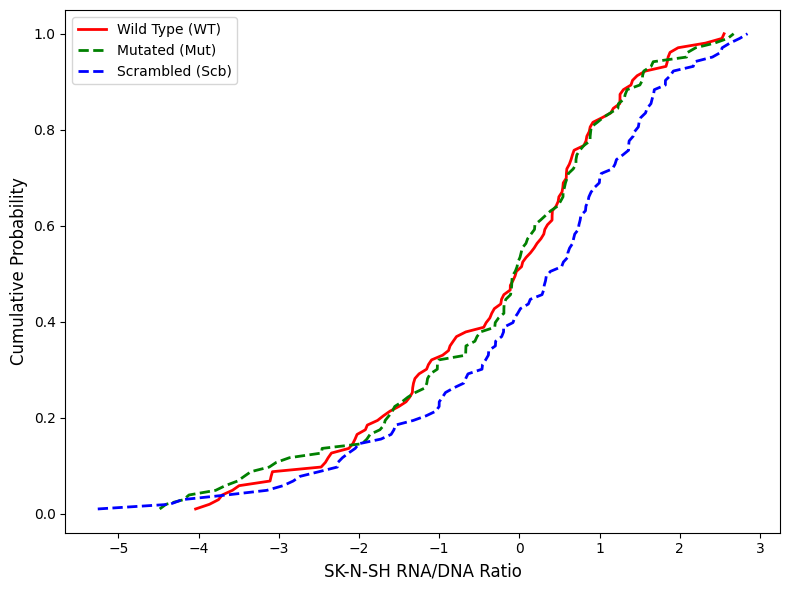

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as st
import random
from scipy.stats import ttest_ind

counts_wt = pd.read_csv("wt_sk.csv")
counts_mut = pd.read_csv('mut_sk.csv')
counts_scb = pd.read_csv('scb_sk.csv')

# Extract relevant columns to numpy arrays
# Calculate intermediate results

# Sk
Ratio_wt = counts_wt['log2FoldChange']
Ratio_mut = counts_mut['log2FoldChange']
Ratio_scb = counts_scb['log2FoldChange']

# Create DataFrame for analysis
df = pd.DataFrame({'ratio_wt': Ratio_wt, 'ratio_mut': Ratio_mut, 'ratio_scb': Ratio_scb})

# Clean DataFrame
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# Extract cleaned ratios
cleaned_wt = df_cleaned['ratio_wt']
cleaned_mut = df_cleaned['ratio_mut']
cleaned_scb = df_cleaned['ratio_scb']

# Generate ECDF for wild type and mutant
ecdf_wt = ECDF(cleaned_wt)
ecdf_mut = ECDF(cleaned_mut)
ecdf_scb = ECDF(cleaned_scb)

# Plot CEDF
plt.figure(figsize=(8, 6))

# Plot CEDF for wild type
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)

# Plot CEDF for mutant
plt.plot(ecdf_mut.x, ecdf_mut.y, label='Mutated (Mut)', color='green', linestyle='--', lw=2)

# Plot CEDF for scrambled
plt.plot(ecdf_scb.x, ecdf_scb.y, label='Scrambled (Scb)', color='blue', linestyle='--', lw=2)

# Add labels, legend, and title
plt.xlabel('SK-N-SH RNA/DNA Ratio', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
# plt.title('Cumulative Empirical Distribution Function (CEDF)', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

## wt vs mut/  wt vs scrambled (paired, same rows)

In [119]:
## Sk cell line
import pandas as pd

# Load your DataFrame (assuming 'counts' is already loaded)
counts = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv')

# Extract gene identifier (first three parts of 'Name' before '|mutated')
counts['Gene_ID'] = counts['Name'].str.replace(r'\|mutated$', '', regex=True)

# Identify genes that have both 'mutated' and wild-type versions
mutated_genes = counts[counts['Name'].str.contains(r'\|mutated$', na=False)]['Gene_ID'].unique()
wt_genes = counts[~counts['Name'].str.contains(r'\|mutated$', na=False)]['Gene_ID'].unique()

# Find genes that have both wild-type and mutated versions
common_genes = set(mutated_genes) & set(wt_genes)

# Filter mut_df and wt_df to keep only common genes
mut_df = counts[counts['Name'].str.contains(r'\|mutated$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()
wt_df = counts[~counts['Name'].str.contains(r'\|mutated$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()


0.16854667271882443 0.8661892732596722


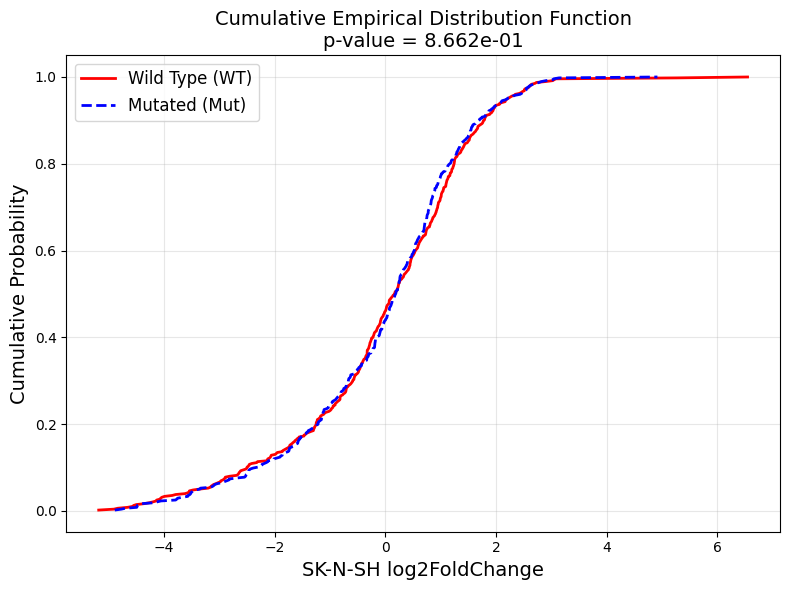

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ttest_ind

# Ensure log2FoldChange is numeric and drop invalid values
wt_df['log2FoldChange'] = pd.to_numeric(wt_df['log2FoldChange'], errors='coerce')
mut_df['log2FoldChange'] = pd.to_numeric(mut_df['log2FoldChange'], errors='coerce')

# Remove NaN and infinite values
wt_cleaned = wt_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()
mut_cleaned = mut_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()

# Compute ECDF
ecdf_wt = ECDF(wt_cleaned)
ecdf_mut = ECDF(mut_cleaned)

# Perform t-test (optional)
t_stat, p_value = ttest_ind(wt_cleaned, mut_cleaned, equal_var=False)
print(t_stat, p_value)

# Plot CEDF
plt.figure(figsize=(8, 6))
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)
plt.plot(ecdf_mut.x, ecdf_mut.y, label='Mutated (Mut)', color='blue', linestyle='--', lw=2)

# Formatting
plt.xlabel('SK-N-SH log2FoldChange', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title(f'Cumulative Empirical Distribution Function\np-value = {p_value:.3e}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()



-0.8756465919588892 0.3822000898500054


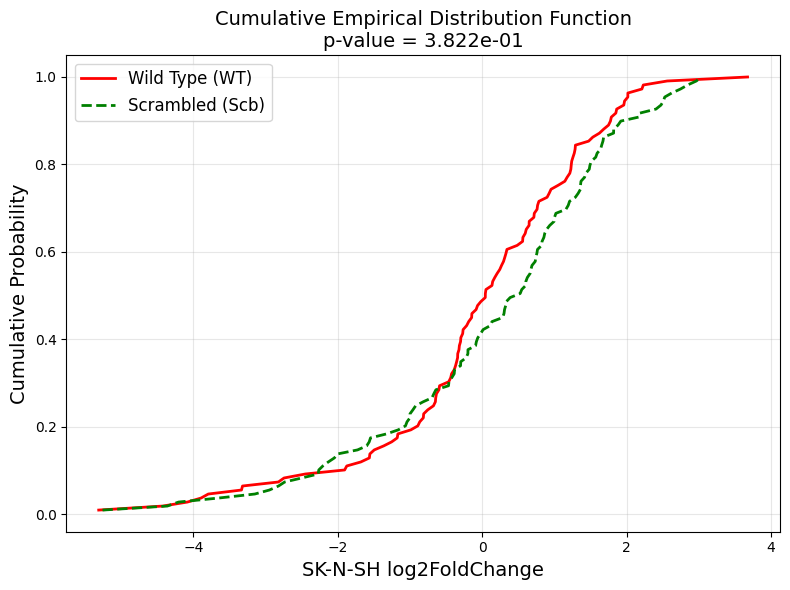

In [121]:
## SK cell line, wt vs scb
import pandas as pd

# Load your DataFrame (assuming 'counts' is already loaded)
# counts = pd.read_csv('your_file.csv')

# Extract gene identifier (first three parts of 'Name' before '|scrambled')
counts['Gene_ID'] = counts['Name'].str.replace(r'\|scrambled$', '', regex=True)

# Identify genes that have both 'scrambled' and wild-type versions
scrambled_genes = counts[counts['Name'].str.contains(r'\|scrambled$', na=False)]['Gene_ID'].unique()
wt_genes = counts[~counts['Name'].str.contains(r'\|scrambled$', na=False)]['Gene_ID'].unique()

# Find genes that have both wild-type and scrambled versions
common_genes = set(scrambled_genes) & set(wt_genes)

# Filter scb_df and wt_df to keep only common genes
scb_df = counts[counts['Name'].str.contains(r'\|scrambled$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()
wt_df = counts[~counts['Name'].str.contains(r'\|scrambled$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ttest_ind

# Ensure log2FoldChange is numeric and drop invalid values
wt_df['log2FoldChange'] = pd.to_numeric(wt_df['log2FoldChange'], errors='coerce')
scb_df['log2FoldChange'] = pd.to_numeric(scb_df['log2FoldChange'], errors='coerce')

# Remove NaN and infinite values
wt_cleaned = wt_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()
scb_cleaned = scb_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()

# Compute ECDF
ecdf_wt = ECDF(wt_cleaned)
ecdf_scb = ECDF(scb_cleaned)

# Perform t-test (optional)
t_stat, p_value = ttest_ind(wt_cleaned, scb_cleaned, equal_var=False)
print(t_stat, p_value)

# Plot CEDF
plt.figure(figsize=(8, 6))
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)
plt.plot(ecdf_scb.x, ecdf_scb.y, label='Scrambled (Scb)', color='green', linestyle='--', lw=2)

# Formatting
plt.xlabel('SK-N-SH log2FoldChange', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title(f'Cumulative Empirical Distribution Function\np-value = {p_value:.3e}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


-0.0797012429414992 0.9364915092328386


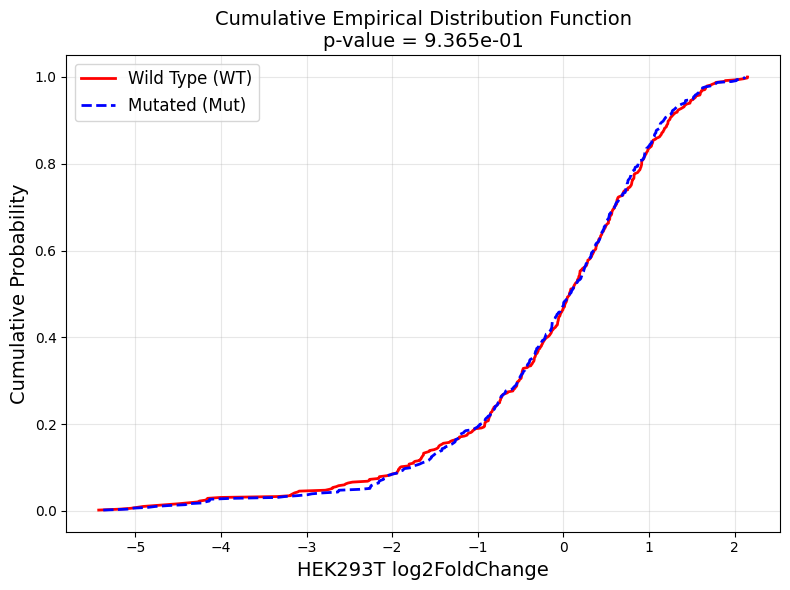

In [122]:
## HEK wt vs mut
import pandas as pd

# Load your DataFrame (assuming 'counts' is already loaded)
counts = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_hek_df100.csv')

# Extract gene identifier (first three parts of 'Name' before '|mutated')
counts['Gene_ID'] = counts['Name'].str.replace(r'\|mutated$', '', regex=True)

# Identify genes that have both 'mutated' and wild-type versions
mutated_genes = counts[counts['Name'].str.contains(r'\|mutated$', na=False)]['Gene_ID'].unique()
wt_genes = counts[~counts['Name'].str.contains(r'\|mutated$', na=False)]['Gene_ID'].unique()

# Find genes that have both wild-type and mutated versions
common_genes = set(mutated_genes) & set(wt_genes)

# Filter mut_df and wt_df to keep only common genes
mut_df = counts[counts['Name'].str.contains(r'\|mutated$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()
wt_df = counts[~counts['Name'].str.contains(r'\|mutated$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ttest_ind

# Ensure log2FoldChange is numeric and drop invalid values
wt_df['log2FoldChange'] = pd.to_numeric(wt_df['log2FoldChange'], errors='coerce')
mut_df['log2FoldChange'] = pd.to_numeric(mut_df['log2FoldChange'], errors='coerce')

# Remove NaN and infinite values
wt_cleaned = wt_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()
mut_cleaned = mut_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()

# Compute ECDF
ecdf_wt = ECDF(wt_cleaned)
ecdf_mut = ECDF(mut_cleaned)

# Perform t-test (optional)
t_stat, p_value = ttest_ind(wt_cleaned, mut_cleaned, equal_var=False)
print(t_stat, p_value)

# Plot CEDF
plt.figure(figsize=(8, 6))
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)
plt.plot(ecdf_mut.x, ecdf_mut.y, label='Mutated (Mut)', color='blue', linestyle='--', lw=2)

# Formatting
plt.xlabel('HEK293T log2FoldChange', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title(f'Cumulative Empirical Distribution Function\np-value = {p_value:.3e}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


-0.444713833393001 0.6569787958694273


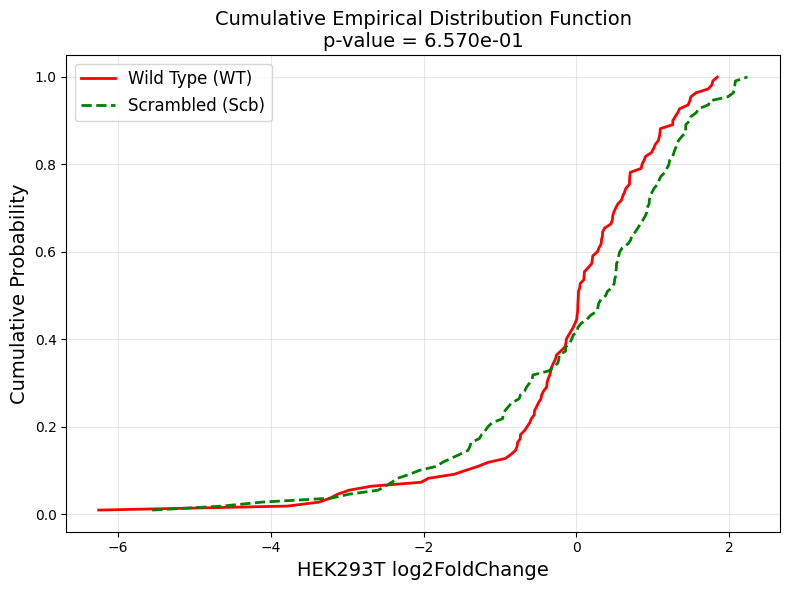

In [123]:
## HEK wt vs scb
import pandas as pd

# Load your DataFrame (assuming 'counts' is already loaded)
# counts = pd.read_csv('your_file.csv')

# Extract gene identifier (first three parts of 'Name' before '|scrambled')
counts['Gene_ID'] = counts['Name'].str.replace(r'\|scrambled$', '', regex=True)

# Identify genes that have both 'scrambled' and wild-type versions
scrambled_genes = counts[counts['Name'].str.contains(r'\|scrambled$', na=False)]['Gene_ID'].unique()
wt_genes = counts[~counts['Name'].str.contains(r'\|scrambled$', na=False)]['Gene_ID'].unique()

# Find genes that have both wild-type and scrambled versions
common_genes = set(scrambled_genes) & set(wt_genes)

# Filter scb_df and wt_df to keep only common genes
scb_df = counts[counts['Name'].str.contains(r'\|scrambled$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()
wt_df = counts[~counts['Name'].str.contains(r'\|scrambled$', na=False) & counts['Gene_ID'].isin(common_genes)].copy()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ttest_ind

# Ensure log2FoldChange is numeric and drop invalid values
wt_df['log2FoldChange'] = pd.to_numeric(wt_df['log2FoldChange'], errors='coerce')
scb_df['log2FoldChange'] = pd.to_numeric(scb_df['log2FoldChange'], errors='coerce')

# Remove NaN and infinite values
wt_cleaned = wt_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()
scb_cleaned = scb_df['log2FoldChange'].replace([np.inf, -np.inf], np.nan).dropna()

# Compute ECDF
ecdf_wt = ECDF(wt_cleaned)
ecdf_scb = ECDF(scb_cleaned)

# Perform t-test (optional)
t_stat, p_value = ttest_ind(wt_cleaned, scb_cleaned, equal_var=False)
print(t_stat, p_value)

# Plot CEDF
plt.figure(figsize=(8, 6))
plt.plot(ecdf_wt.x, ecdf_wt.y, label='Wild Type (WT)', color='red', linestyle='-', lw=2)
plt.plot(ecdf_scb.x, ecdf_scb.y, label='Scrambled (Scb)', color='green', linestyle='--', lw=2)

# Formatting
plt.xlabel('HEK293T log2FoldChange', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title(f'Cumulative Empirical Distribution Function\np-value = {p_value:.3e}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()